In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing libraries for audio files analysis

import librosa
import librosa.display
import sklearn

In [3]:
# Assigning variable to location of the songs folder

#full_songs_path = r"D:\UoR\fall2022\datamining\final_project\downloaded_songs\manually_downloaded\fullsongs"
full_songs_path = '/content/drive/MyDrive/Data mining/fullsongs'
#short_songs_path = r"D:\UoR\fall2022\datamining\final_project\downloaded_songs\manually_downloaded\shorts"
short_songs_path = '/content/drive/MyDrive/Data mining/shorts'

In [4]:
# Selecting the first full and short song to view results

short_song = short_songs_path + '/' + sorted(os.listdir(short_songs_path))[0]
full_song = full_songs_path + '/' + sorted(os.listdir(full_songs_path))[0]

In [5]:
# To load the audio file 

def load_song(path):
  x, sr = librosa.load(path)
  return x, sr

In [6]:
# To display waveplot

def display_waveplot(x, sr):
  plt.figure(figsize=(14,5))
  librosa.display.waveplot(x, sr)

In [7]:
# To display spectrogram before and after taking log

def display_spectrogram(x, sr):
  X = librosa.stft(x)
  Xdb = librosa.amplitude_to_db(abs(X))
  print("Without taking log")
  plt.figure(figsize=(14, 5))
  librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
  plt.colorbar()
  plt.show()
  print("After taking log")
  plt.figure(figsize=(14, 5))
  librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
  plt.colorbar()
  plt.show()

In [8]:
# To return the timestamp from the frame

def frame_to_time(frame):
  t = librosa.frames_to_time(frame)
  return t

In [9]:
# Normalize the data for processing purpose

def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

In [10]:
# To calculate the spectral centroids and plot the graph 

def spectral_centroid(x, sr):
  spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
  plt.figure(figsize=(14, 5))
  frames = range(len(spectral_centroids))
  t = frame_to_time(frames)
  librosa.display.waveplot(x, sr=sr, alpha=0.4)
  plt.plot(t, normalize(spectral_centroids), color='r')

In [11]:
# To calculate the spectral rolloff and plot the graph 

def spectral_rolloff(x, sr):
  spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
  plt.figure(figsize=figure_size)
  librosa.display.waveplot(x, sr=sr, alpha=0.4)
  frames = range(len(spectral_rolloff))
  t = frame_to_time(frames)
  plt.plot(t, normalize(spectral_rolloff), color='r')

In [12]:
# To calculate the zero crossing rate and return the sum over the entire audio file

def zero_crossing_rate(x):
  zero_crossings = librosa.zero_crossings(x, pad=False)
  print(sum(zero_crossings))

In [13]:
# To display spectrogram of the mfcc values

def mfcc_spectrogram(mfcc, sr):
  plt.figure(figsize=figure_size)
  librosa.display.specshow(mfcc, sr=sr, x_axis='time')

In [14]:
# To display chromagram

def chroma(x, sr):
  hop_length = 512
  chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
  fig, ax = plt.subplots(figsize=figure_size)
  img = librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
  fig.colorbar(img, ax=ax)
  plt.show()

In [14]:
# Calling all the function

In [15]:
x, sr = load_song(short_song)
figure_size = (14,5)
#print(sr)

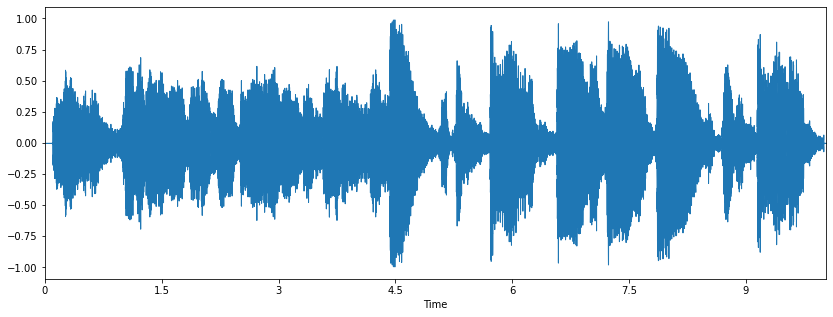

In [16]:
display_waveplot(x, sr)

Without taking log


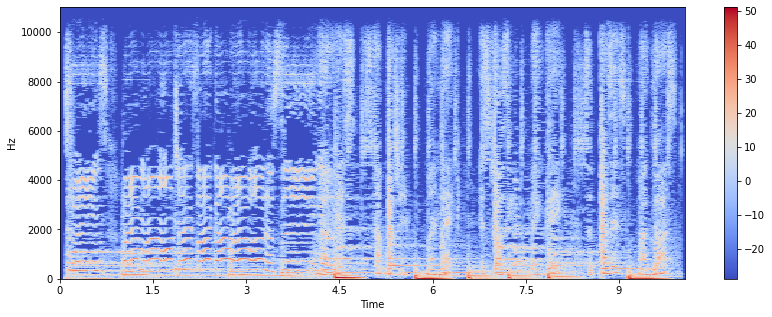

After taking log


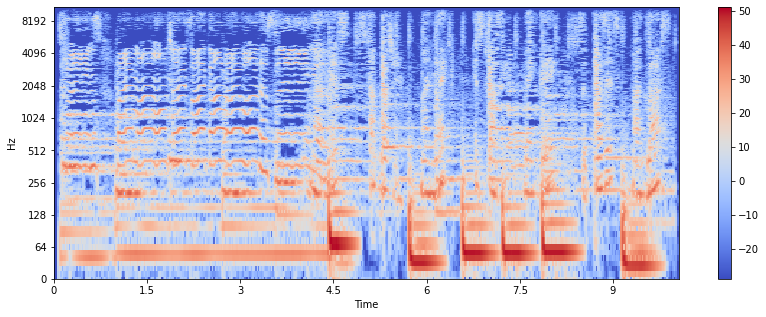

In [17]:
display_spectrogram(x, sr)

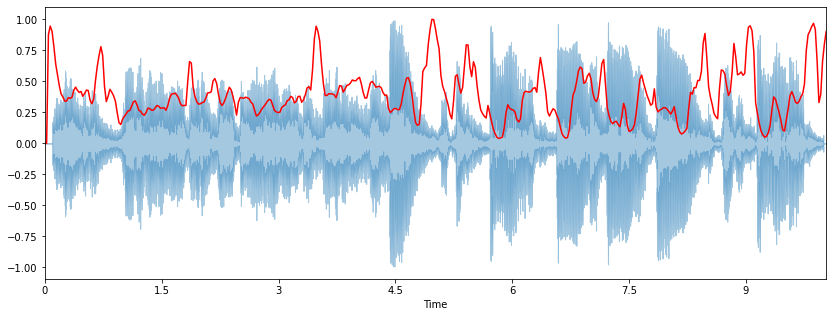

In [18]:
spectral_centroid(x, sr)

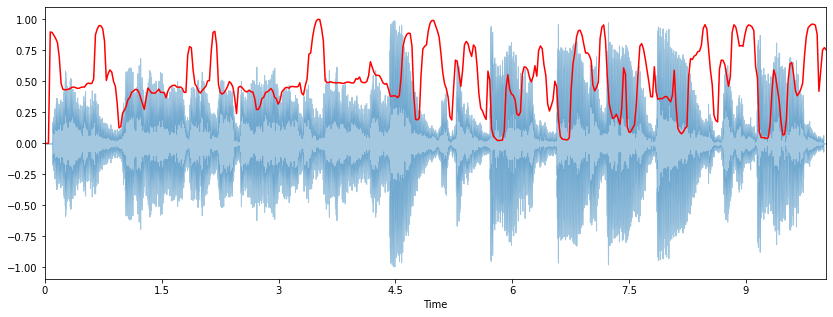

In [19]:
spectral_rolloff(x, sr)

In [20]:
zero_crossing_rate(x)

19464


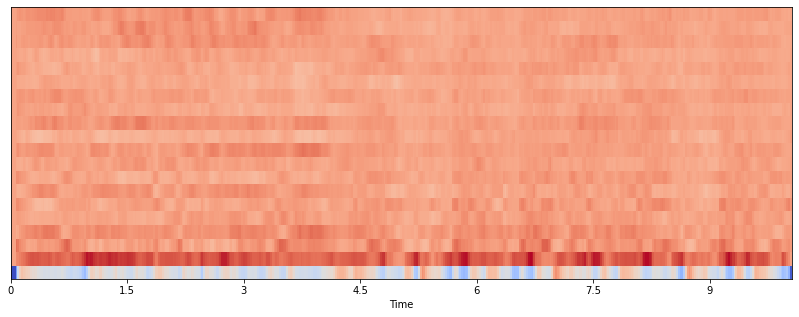

In [21]:
mfcc = librosa.feature.mfcc(x, sr)
mfcc_spectrogram(mfcc, sr)

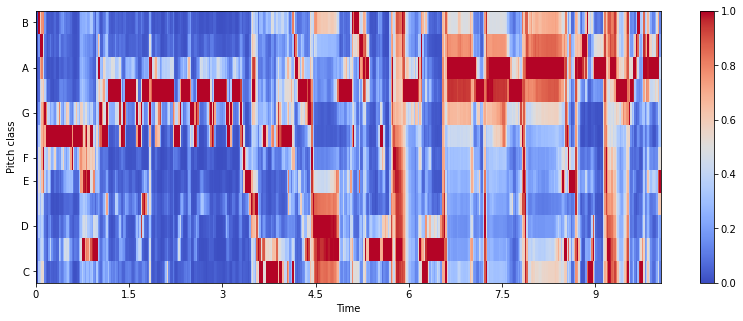

In [22]:
chroma(x, sr)